## Ridge Regression

In [1]:
from src.si.io.csv_file import read_csv
from sklearn.preprocessing import StandardScaler
from src.si.model_selection.split import train_test_split
from src.si.linear_model.ridge_regression import RidgeRegression

In [2]:
cpu_data = read_csv(r"C:\Users\35193\Desktop\sib\SIB\datasets\cpu.csv",features=True,label=True)
cpu_data.print_dataframe()

,syct,mmin,mmax,cach,chmin,chmax
198,125,256,6000,256,16,128
269,29,8000,32000,32,8,32
220,29,8000,32000,32,8,32
172,29,8000,32000,32,8,32
132,29,8000,16000,32,8,16
...,...,...,...,...,...,...
42,124,1000,8000,0,1,8
46,98,1000,8000,32,2,8
52,125,2000,8000,0,2,14
67,480,512,8000,32,0,0


In [21]:
from itertools import islice

cpu_data.X = StandardScaler().fit_transform(cpu_data.X)
cpu_train, cpu_test = train_test_split(cpu_data)
ridge_regression = RidgeRegression(max_iter=20000)
ridge_regression.fit(cpu_train)

# cost history
dict_cost=ridge_regression.cost_history

# select only some entrys
def take(n, iterable):
    """Return the first n items of the iterable as a list."""
    return list(islice(iterable, n))

n_items = take(10, dict_cost.items())
print(n_items)

[(0, 21456.4375), (1, 21350.980499370762), (2, 21246.219828032885), (3, 21142.150585325948), (4, 21038.767905712077), (5, 20936.066958522977), (6, 20834.042947708764), (7, 20732.691111588636), (8, 20632.006722603302), (9, 20531.985087069246)]


In [22]:
# score
ridge_regression.score(cpu_test)

1079.7897775593995

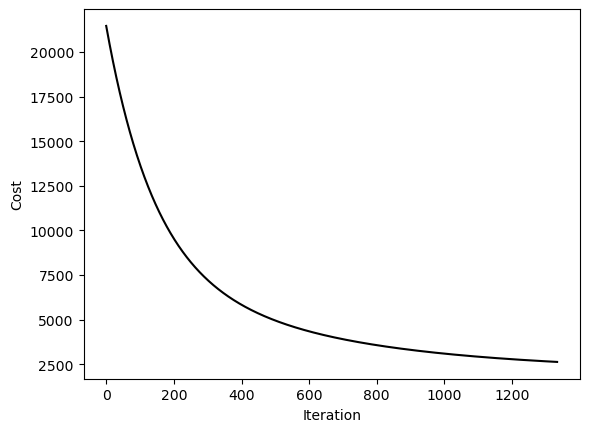

In [23]:
# grafico de cost history
ridge_regression.plot_cost_history()